In [1]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from matplotlib import style

In [2]:
#Importamos el dataset de sklearn

from sklearn.datasets import load_boston

boston = load_boston()

In [3]:
#Verificamos si existen “keys” o atributos, ya que esta base datos está basada en un diccionario.

print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
#Verificamos el tamaño, la descripción, y el encabezado de cada columna

boston.data.shape


(506, 13)

In [5]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
#Conociendo más los datos podemos ahora a convertirlos en “pandas”.


bostonpd = pd.DataFrame(boston.data)

print(bostonpd.head())

         0     1     2    3      4      5     6       7    8      9    10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [7]:
#El encabezado de las columnas ya no aparece, esto lo podemos solucionar fácilmente utilizando “feature_names”

bostonpd.columns = boston.feature_names
print(bostonpd.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [8]:
#Si observamos la base datos podrás ver que no existe ninguna columna con los precios de las casas, 
#pero si te acuerdas cuando verificamos los “keys” había uno de ellos llamado “target”, este es el que contiene los precios, 
#por lo que lo incluimos en la nueva base de datos que estamos creando.


bostonpd['PRICE'] = boston.target
print(bostonpd.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


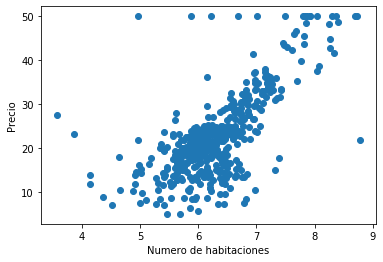

In [9]:
#Graficar el contraste entre el precio y el número de habitaciones de las viviendas.

plt.scatter(bostonpd.RM, bostonpd.PRICE)
plt.xlabel('Numero de habitaciones')
plt.ylabel('Precio')
plt.show()

In [10]:
X = np.array(bostonpd.drop(['PRICE'], axis=1))
X = preprocessing.scale(X)
y = np.array(bostonpd['PRICE'])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
#Aplicamos el algoritmo para obtener el modelo para luego ser usado para predecir los precios de las casas. 
#En este caso utilizamos el algoritmo de aprendizaje supervisado: regresión lineal. 
#Al mismo tiempo calculamos la confianza del modelo, entre más cercano sea este número a 1 más confiable es el modelo.


lr = LinearRegression()
lr.fit(X_train, y_train)
confianza = lr.score(X_test, y_test)
print('Confianza = ', confianza)

Confianza =  0.7662752600881296


In [13]:
#Continuamos ahora con la predicción de los datos utilizando el modelo anteriormente definido,
#y calculamos la media del error para verificar que tan exacto fueron los datos obtenidos.

predict = lr.predict(X_test)
resta = np.mean(y_test - predict)
print('Error = ', resta)

Error =  0.24281804698490972
